# 01_data_inspection.ipynb

## 📂 셀 1: 제목 및 개요 (Markdown)
# 01. Data Inspection
이번 노트북에서는
1. 원본 `forecast` & `observed` 데이터 로드 및 병합  
2. 결측치, 기본 통계, 이상치 탐색  
3. Feature/Target 분리 및 모양(shape) 확인  
4. Feature–Target 상관관계 히트맵 시각화  
단계로 진행합니다.


In [2]:
## 🔧 셀 2: 라이브러리 임포트 (Code)
import sys, os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.preprocessing import load_and_merge

In [ ]:
# 병합 실행
merged_df = load_and_merge(force_rebuild=False)

# 결과 확인
print("\n 병합된 데이터 컬럼 목록 : ")
print(merged_df.columns.tolist())

In [8]:
# 5단계) 결측값, 기본 통계 분석, 이상치 확인
# 1. 결측치 확인
print("\n [결측치 확인]")
null_counts = merged_df.isnull().sum()
print(null_counts[null_counts > 0] if null_counts.sum() > 0 else "결측치 없음")

# 2. 기본 통계 요약
print("\n [기본 통계 요약]")
print(merged_df.describe())

# 3. 이상치 탐색 (IQR 방식)
print("\n [이상치 탐색 - IQR 기준]")
def count_outliers(series):
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return ((series < lower) | (series > upper)).sum()

for col in merged_df.select_dtypes(include='number').columns:
    outlier_count = count_outliers(merged_df[col])
    print(f"{col}: {outlier_count}개")


 [결측치 확인]
결측치 없음

 [기본 통계 요약]
                            datetime  일사량(w/m^2)_예측      습도(%)_예측  \
count                          10584   10584.000000  10584.000000   
mean   2024-08-12 08:21:58.367346944     162.429645     51.592617   
min              2024-01-02 00:00:00       0.000000     13.125000   
25%              2024-04-21 05:45:00       0.000000     42.117750   
50%              2024-08-11 11:30:00       0.000000     51.686500   
75%              2024-12-01 17:15:00     283.691000     60.935500   
max              2025-03-31 23:00:00     964.465000     86.782000   
std                              NaN     237.095857     13.557537   

            절대습도_예측   기온(degC)_예측  대기압(mmHg)_예측          hour         month  \
count  10584.000000  10584.000000  10584.000000  10584.000000  10584.000000   
mean       0.007774     12.205749    750.552245     11.500000      5.668934   
min        0.001000    -11.329000    734.983879      0.000000      1.000000   
25%        0.003000      2.4647

In [10]:
features = [
    '일사량(w/m^2)_예측',
    '습도(%)_예측',
    '절대습도_예측',
    '기온(degC)_예측',
    '대기압(mmHg)_예측'
]
targets = [
    '습도(%)_관측',
    '기온(degC)_관측',
    '대기압(mmHg)_관측'
]

# 7단계) Feature / Target 분리
X, y = merged_df[features], merged_df[targets]

# Feature / Target 확인
print("\n Feature(X) shape:", X.shape)
print(" Target(y) shape:", y.shape)

print("\n Feature 컬럼 목록:")
print(X.columns.tolist())

print("\n Target 컬럼 목록:")
print(y.columns.tolist())


 Feature(X) shape: (10584, 5)
 Target(y) shape: (10584, 3)

 Feature 컬럼 목록:
['일사량(w/m^2)_예측', '습도(%)_예측', '절대습도_예측', '기온(degC)_예측', '대기압(mmHg)_예측']

 Target 컬럼 목록:
['습도(%)_관측', '기온(degC)_관측', '대기압(mmHg)_관측']


c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 50696 (\N{HANGUL SYLLABLE YE}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\site-packages\seaborn\utils.py:61: UserWarning: Glyph 52769 (\N{HANGUL SYLLABLE CEUG}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
c:\Users\ajj\Desktop\weather_prediction\.venv\Lib\

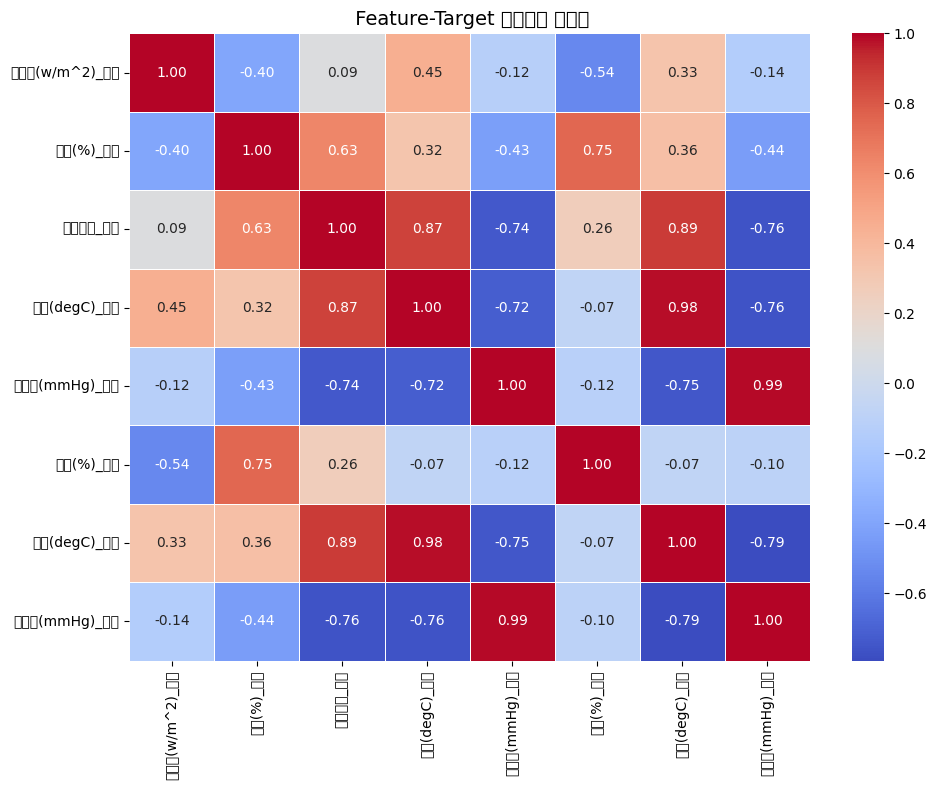

In [11]:
# 8단계) 상관관계 히트맵 시각화
# 1. 입력(X) + 출력(y) 합쳐서 하나의 DataFrame 생성
corr_df = pd.concat([X, y], axis=1) # 두 개의 데이터 프레임을 열 기준으로 합침

# 2. 상관계수 계산 (피어슨 상관계수)
corr_matrix = corr_df.corr() # -1~1사이의 값으로 선형관계를 측정

# 3. 시각화 - 히트맵
plt.figure(figsize=(10, 8)) # 그래프 크기 설정
sns.heatmap(
    corr_matrix,    # 상관계수 행렬 입력
    annot=True,     # 각 칸에 숫자 값 표시
    cmap='coolwarm',# 색상 맵: 파랑~빨강
    fmt=".2f",      # 소수점 둘째 자리까지 표시
    linewidths=0.5  # 셀 간 경계선 두께
)
plt.title(" Feature-Target 상관관계 히트맵", fontsize=14)
plt.tight_layout()
plt.show()